In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Experiment\Codesoft\Credit_Card\archive (2)\fraudTrain.csv",index_col=0,parse_dates=['dob'])

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  object        
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [6]:
df.drop(columns=['trans_date_trans_time','first','last','city','state','zip','cc_num','merchant','street','job','trans_num','dob'],inplace=True,axis=1)

In [7]:
df.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
df.columns

Index(['category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

<Axes: >

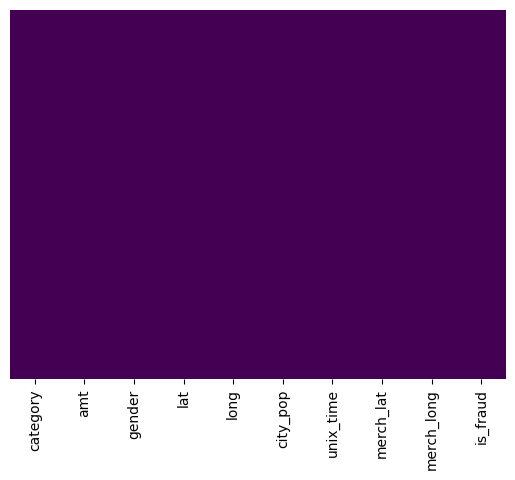

In [9]:
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,gas_transport,45.00,M,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,misc_pos,41.96,M,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


Converting categorical value to numerical values

In [11]:
# Convert 'category' and 'gender' to numeric
df['category'] = pd.Categorical(df['category']).codes
df['gender'] = pd.Categorical(df['gender']).codes

Analyze the data

In [12]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

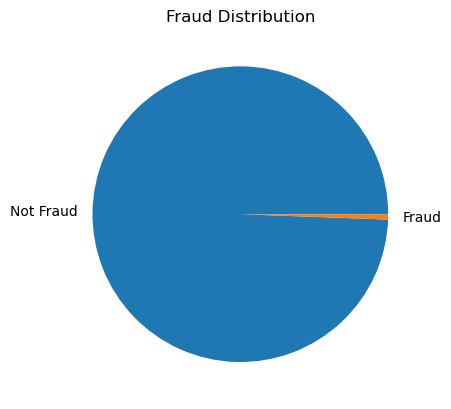

In [13]:
plt.pie(df['is_fraud'].value_counts(),labels = ['Not Fraud', 'Fraud'])
plt.title('Fraud Distribution')
plt.show()

The data is biased so we have to use some technique to make the unbalanced data balanced.
So we have to  use SMOTE

In [14]:
from imblearn.over_sampling import SMOTE  

In [19]:
X , y = df.drop('is_fraud',axis=1),df['is_fraud']

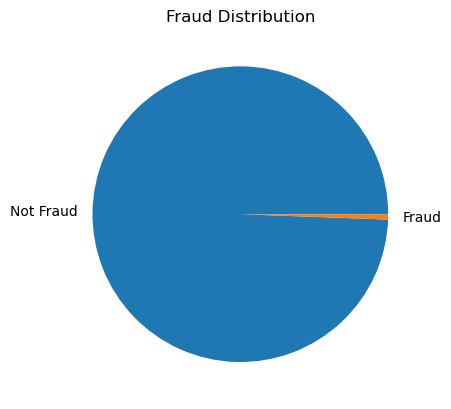

In [20]:
plt.pie(y.value_counts(),labels = ['Not Fraud', 'Fraud'])
plt.title('Fraud Distribution')
plt.show()

In [21]:
y.dropna(inplace=True)

In [22]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [23]:
print(X.shape,y.shape)

(1296675, 9) (1296675,)


In [24]:
X.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long
0,8,4.97,0,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,4,107.23,0,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,0,220.11,1,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,2,45.00,1,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,9,41.96,1,38.4207,-79.4629,99,1325376186,38.674999,-78.632459


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [42]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X.iloc[1:,:], y[1:])

In [43]:
print(X_resampled.shape,y_resampled.shape)

(2578336, 9) (2578336,)


In [63]:
X.head()

,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long
0,8,4.97,0,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,4,107.23,0,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,0,220.11,1,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,2,45.00,1,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,9,41.96,1,38.4207,-79.4629,99,1325376186,38.674999,-78.632459


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  int8   
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  int8   
 3   lat         1296675 non-null  float64
 4   long        1296675 non-null  float64
 5   city_pop    1296675 non-null  int64  
 6   unix_time   1296675 non-null  int64  
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
dtypes: float64(5), int64(2), int8(2)
memory usage: 81.6 MB


In [45]:
print(df.isnull().sum())


category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [47]:
print(X_train.shape,y_train.shape)

(2062668, 9) (2062668,)


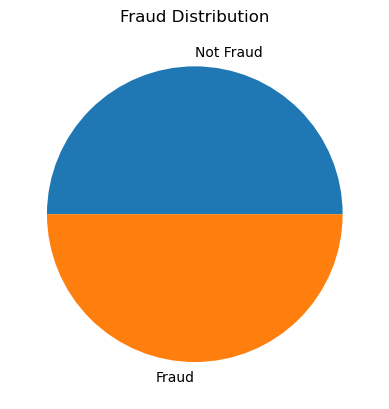

In [48]:
plt.pie(y_resampled.value_counts(),labels = ['Not Fraud', 'Fraud'])
plt.title('Fraud Distribution')
plt.show()

Training Model

In [49]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()                                #It is making standardized data , x-meu/sigma
X_train_scaled = scaler.fit_transform(X_train)           #Fit calculate mu and sigma , Transform transforms the data
X_test_scaled = scaler.transform(X_test)                 #fit and transform does both fit amd transform 

In [55]:
lasso = Lasso()
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100],
        'max_iter':[1,2,4,7,10,15,20,30]}
grid_search = GridSearchCV(lasso,para,cv=5,scoring="neg_mean_squared_error",n_jobs=11)

In [64]:
y_train.head()

2151563    1
1366564    1
1914144    1
356496     0
2135095    1
Name: is_fraud, dtype: int64

In [65]:
grid_search.fit(X_train_scaled,y_train)

c:\Users\Smile\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+05, tolerance: 5.157e+01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=11,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 45, 50, 55, 100],
                         'max_iter': [1, 2, 4, 7, 10, 15, 20, 30]},
             scoring='neg_mean_squared_error')

In [66]:
Lasso_reg = grid_search.best_estimator_

In [67]:
grid_search.best_params_

{'alpha': 1e-15, 'max_iter': 30}

Save the Model

In [69]:
import joblib

In [70]:
 joblib.dump(Lasso_reg,'Lasso_reg.pkl')

['Lasso_reg.pkl']

In [92]:
predicted = Lasso_reg.predict(X_test_scaled)

In [93]:
predicted

array([0.59560822, 0.11336768, 0.10120959, ..., 1.29632024, 0.69202876,
       0.79355739])

In [94]:
threshold = 0.5
predicted_labels = (predicted > threshold).astype(int)

f1 = f1_score(y_test, predicted_labels)
acc = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)

print("F1 Score:", f1)
print("Accuracy:", acc)
print("Recall:", recall)

F1 Score: 0.8530829870315196
Accuracy: 0.8682291707067338
Recall: 0.7645396942275273


Importing the test file

In [95]:
test_df = pd.read_csv(r"D:\Experiment\Codesoft\Credit_Card\archive (2)\fraudTest.csv",index_col=0)
test_df.drop(columns=['trans_date_trans_time','first','last','city','state','zip','cc_num','merchant','street','job','trans_num','dob'],inplace=True,axis=1)

In [96]:
test_df['category'] = pd.Categorical(test_df['category']).codes
test_df['gender'] = pd.Categorical(test_df['gender']).codes

In [97]:
Test = scaler.transform(test_df.drop(columns='is_fraud').iloc[1:,:])

In [98]:
Test.shape

(555718, 9)

In [99]:
test_pre = Lasso_reg.predict(Test)

In [100]:
Actual_value = test_df['is_fraud'].iloc[1:]

In [105]:
threshold = 0.4
predicted_labels = (test_pre > threshold).astype(int)

f1 = f1_score(Actual_value, predicted_labels)
acc = accuracy_score(Actual_value, predicted_labels)
recall = recall_score(Actual_value, predicted_labels)

print("F1 Score:", f1)
print("Accuracy:", acc)
print("Recall:", recall)

F1 Score: 0.07815451454476766
Accuracy: 0.9297449425787899
Recall: 0.7715617715617715
